#   This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click !here goes the icon of the corresponding button in the gutter! button.
To debug a cell, press Alt+Shift+Enter, or click !here goes the icon of the corresponding button in the gutter! button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/jupyter-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [10]:
import featuretools as ft
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import seaborn as sns

дивимось першу таблицю

In [2]:
data_red = pd.read_csv('data/winequality-red.csv', delimiter=';')
data_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


дивимось другу таблицю

In [3]:
data_white = pd.read_csv('data/winequality-white.csv', delimiter=';')
data_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
data_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
data_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


ми побачили що у таблицях назви фіч однакові нема пустих фіч нема пропусків рядків

зробимо аналіз кореляції

In [62]:
correlation_data_white = data_white.corr()['quality'].sort_values(ascending=False)
correlation_data_white



quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64

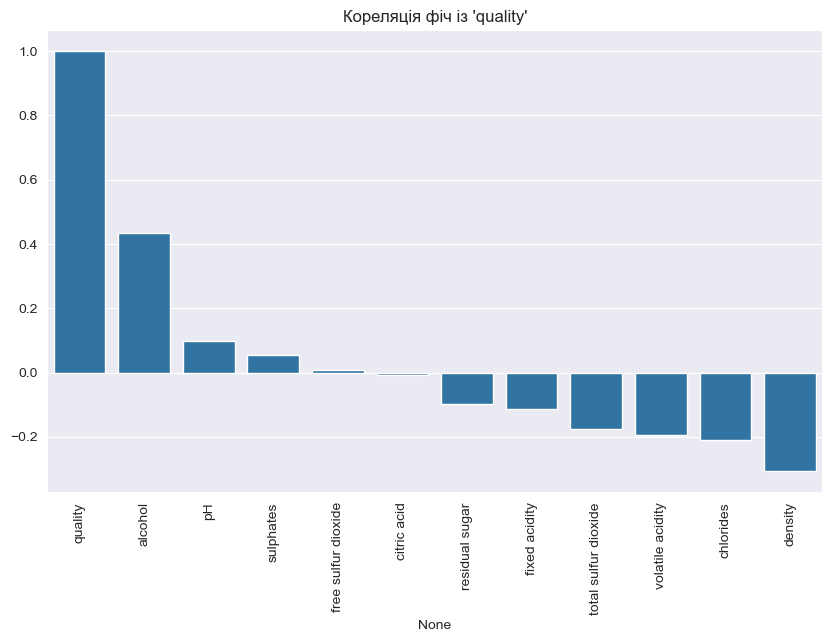

In [51]:
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_data_white.index, y=correlation_data_white.values)
plt.xticks(rotation=90)
plt.title("Кореляція фіч із 'quality'")
plt.show()

бачемо що більшість фіч мають обернену кореляцію але слабку найкращу позитивну має алкогол 

визначаємо цільову змінну

In [52]:
X = data_white.drop(columns=["quality"])
y = data_white["quality"]

розбиваємо на тестову і тренувальну частини 2/8

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

тренуємо

In [54]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

дивимось що вийшло


In [64]:
y_pred = model.predict(X_test)

In [56]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nСередньоквадратична помилка (MSE):", mse)
print("Коефіцієнт детермінації (R²):", r2)


Середньоквадратична помилка (MSE): 0.5690247717229286
Коефіцієнт детермінації (R²): 0.2652750042179113


MSE віглядає не дуже гарно скоріш за все результати нас не порадують подивимось детально як спрацювала наша модель

In [66]:
feature_importance = pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)
print("\n  вагомість фіч:")
print(feature_importance.head(10))


  вагомість фіч:
sulphates               0.649073
pH                      0.600700
alcohol                 0.229009
residual sugar          0.071240
fixed acidity           0.045907
free sulfur dioxide     0.005119
total sulfur dioxide   -0.000242
chlorides              -0.026475
citric acid            -0.061303
volatile acidity       -1.914884
dtype: float64


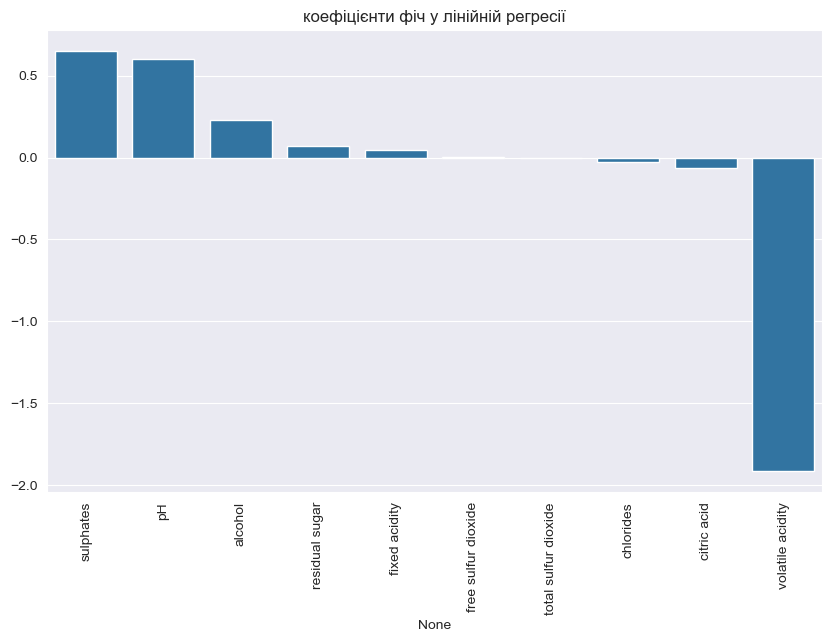

In [76]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.index[:10], y=feature_importance.values[:10])
plt.xticks(rotation=90)
plt.title("коефіцієнти фіч у лінійній регресії")
plt.show()


на графіку бачимо що основний вплив мали 2 перші фічі та остання

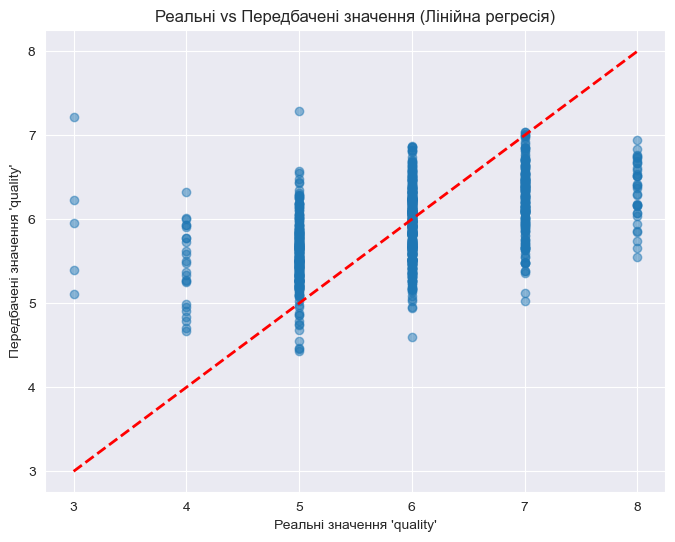

In [60]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Реальні значення 'quality'")
plt.ylabel("Передбачені значення 'quality'")
plt.title("Реальні vs Передбачені значення (Лінійна регресія)")
plt.show()

зцьго граіфку ми бачимо що наца модель найкраще працює з оцінками 5 та 6 а от з крайніми у нас біда також побачили що в датасеті моло крайніх оцінок скоріш за все це є основною причиною помилок давайте розширимо датасет об'єднавши 2 таблиці

In [49]:
data_combined = pd.concat([data_red, data_white]).reset_index(drop=True)
data_combined.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
data_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


подивимось що змінилось

In [77]:
correlation_data_combined = data_combined.corr()['quality'].sort_values(ascending=False)
print("Кореляція з 'quality':")
print(correlation_data_combined)  


Кореляція з 'quality':
quality                 1.000000
alcohol                 0.444319
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64


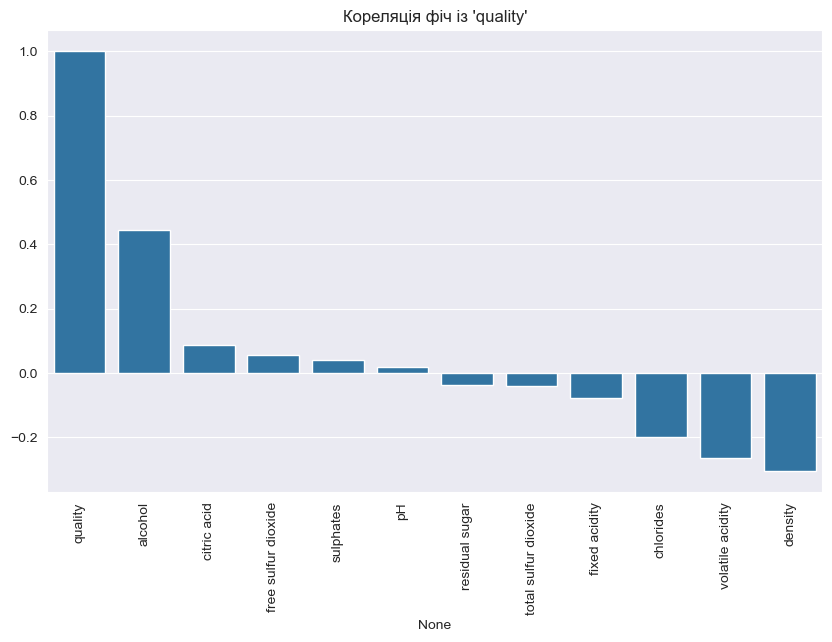

In [78]:
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_data_combined.index, y=correlation_data_combined.values)
plt.xticks(rotation=90)
plt.title("Кореляція фіч із 'quality'")
plt.show()

бачемо зміни в кореляціях але вони не значні

In [79]:
X = data_combined.drop(columns=["quality"])
y = data_combined["quality"]

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [82]:
y_pred = model.predict(X_test)


In [83]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nСередньоквадратична помилка (MSE):", mse)
print("Коефіцієнт детермінації (R²):", r2)



Середньоквадратична помилка (MSE): 0.5466964419580561
Коефіцієнт детермінації (R²): 0.25976731297901934


MSE трохт покращелось 

In [85]:
feature_importance = pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)
print("\nКоефіцієнти фіч (вагомість):")
print(feature_importance.head(10))



Коефіцієнти фіч (вагомість):
sulphates               0.808360
pH                      0.482842
alcohol                 0.270669
fixed acidity           0.078975
residual sugar          0.045949
free sulfur dioxide     0.007025
total sulfur dioxide   -0.002663
citric acid            -0.143778
chlorides              -0.332842
volatile acidity       -1.350775
dtype: float64


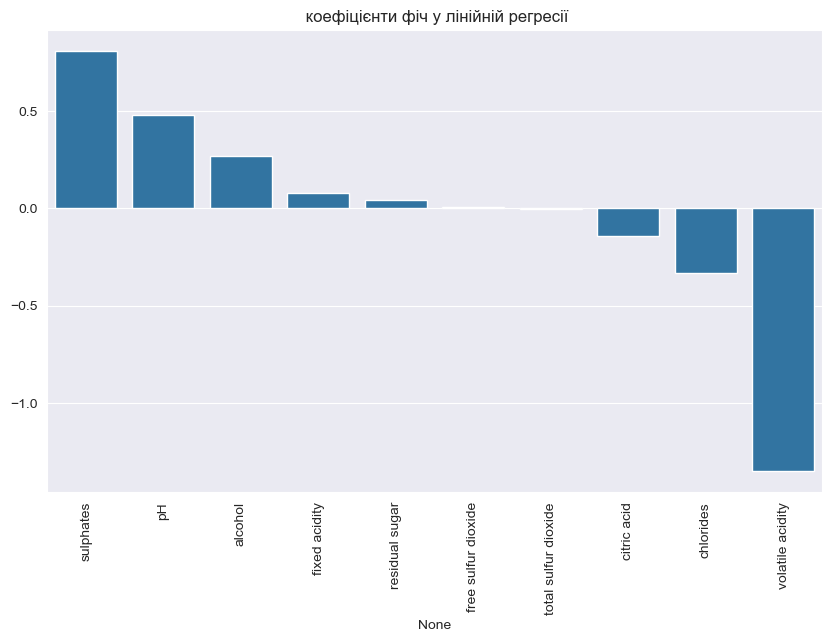

In [88]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.index[:10], y=feature_importance.values[:10])
plt.xticks(rotation=90)
plt.title(" коефіцієнти фіч у лінійній регресії")
plt.show()


бачимо що кількість фіч що вплинули на модель зросла

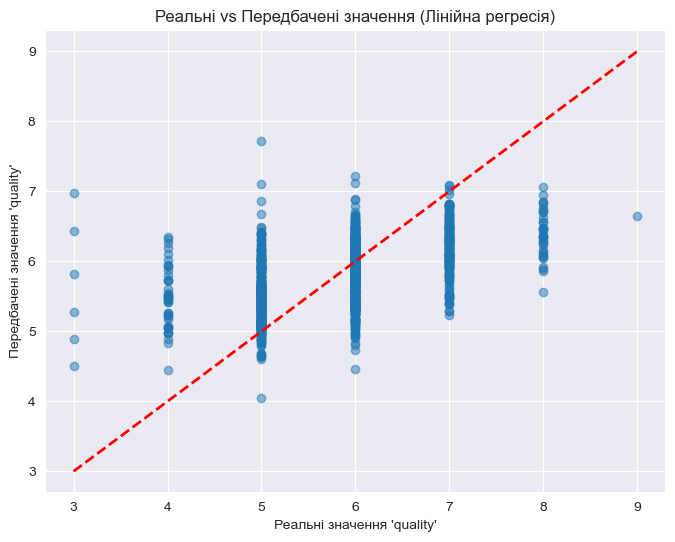

In [87]:
# Графік реальних vs передбачених значень
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Реальні значення 'quality'")
plt.ylabel("Передбачені значення 'quality'")
plt.title("Реальні vs Передбачені значення (Лінійна регресія)")
plt.show()

бачимо покращення але вони не сутеві що підтверджує показник MSE

так як більше данних нам узяти ніде зробимо нові фічі

In [89]:
data_combined['unique_id'] = range(1, len(data_combined) + 1)


Створюємо EntitySet

In [90]:

es = ft.EntitySet(id="wine_dataset")
es = es.add_dataframe(
    dataframe_name="wines",
    dataframe=data_combined,
    index="unique_id"
)
es

Entityset: wine_dataset
  DataFrames:
    wines [Rows: 6497, Columns: 13]
  Relationships:
    No relationships

 Генеруємо фічі


In [91]:
feature_matrix, feature_defs = ft.dfs(
    entityset=es,
    target_dataframe_name="wines",
    trans_primitives=[
        "add_numeric",      
        "multiply_numeric", 
        "subtract_numeric",  
        "absolute",          
        "percentile"
            ],
    max_depth=1
)

In [92]:
feature_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,...,quality - residual sugar,quality - sulphates,quality - total sulfur dioxide,quality - volatile acidity,residual sugar - sulphates,residual sugar - total sulfur dioxide,residual sugar - volatile acidity,sulphates - total sulfur dioxide,sulphates - volatile acidity,total sulfur dioxide - volatile acidity
unique_id,,,,,,,,,,,,,,,,,,,,,
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,...,3.1,4.44,-29.0,4.30,1.34,-32.1,1.20,-33.44,-0.14,33.30
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,...,2.4,4.32,-62.0,4.12,1.92,-64.4,1.72,-66.32,-0.20,66.12
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,...,2.7,4.35,-49.0,4.24,1.65,-51.7,1.54,-53.35,-0.11,53.24
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,...,4.1,5.42,-54.0,5.72,1.32,-58.1,1.62,-59.42,0.30,59.72
5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,...,3.1,4.44,-29.0,4.30,1.34,-32.1,1.20,-33.44,-0.14,33.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6493,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,...,4.4,5.50,-86.0,5.79,1.10,-90.4,1.39,-91.50,0.29,91.79
6494,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,...,-3.0,4.54,-163.0,4.68,7.54,-160.0,7.68,-167.54,0.14,167.68
6495,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,...,4.8,5.54,-105.0,5.76,0.74,-109.8,0.96,-110.54,0.22,110.76


In [93]:
feature_defs

[<Feature: fixed acidity>,
 <Feature: volatile acidity>,
 <Feature: citric acid>,
 <Feature: residual sugar>,
 <Feature: chlorides>,
 <Feature: free sulfur dioxide>,
 <Feature: total sulfur dioxide>,
 <Feature: density>,
 <Feature: pH>,
 <Feature: sulphates>,
 <Feature: alcohol>,
 <Feature: quality>,
 <Feature: ABSOLUTE(alcohol)>,
 <Feature: ABSOLUTE(chlorides)>,
 <Feature: ABSOLUTE(citric acid)>,
 <Feature: ABSOLUTE(density)>,
 <Feature: ABSOLUTE(fixed acidity)>,
 <Feature: ABSOLUTE(free sulfur dioxide)>,
 <Feature: ABSOLUTE(pH)>,
 <Feature: ABSOLUTE(quality)>,
 <Feature: ABSOLUTE(residual sugar)>,
 <Feature: ABSOLUTE(sulphates)>,
 <Feature: ABSOLUTE(total sulfur dioxide)>,
 <Feature: ABSOLUTE(volatile acidity)>,
 <Feature: alcohol + chlorides>,
 <Feature: alcohol + citric acid>,
 <Feature: alcohol + density>,
 <Feature: alcohol + fixed acidity>,
 <Feature: alcohol + free sulfur dioxide>,
 <Feature: alcohol + pH>,
 <Feature: alcohol + quality>,
 <Feature: alcohol + residual sugar>,
 <

видаляємо згенеровані фічі з якістю

In [94]:
quality_features = [col for col in feature_matrix.columns if "quality" in col.lower() and col != "quality"]
feature_matrix_cleaned = feature_matrix.drop(columns=quality_features)

дивимось кореляції на згенерованих фічах

In [95]:
correlation = feature_matrix_cleaned.corr()['quality'].sort_values(ascending=False)
print("Кореляція з 'quality' (після видалення фіч із 'quality' у назві):")
correlation

Кореляція з 'quality' (після видалення фіч із 'quality' у назві):


quality                         1.000000
alcohol - volatile acidity      0.474066
alcohol + citric acid           0.451971
alcohol - chlorides             0.446663
alcohol + sulphates             0.445831
                                  ...   
chlorides + volatile acidity   -0.280854
PERCENTILE(chlorides)          -0.286991
density                        -0.305858
ABSOLUTE(density)              -0.305858
PERCENTILE(density)            -0.311374
Name: quality, Length: 199, dtype: float64

залишилось досить багато фіч відфільтруємо які менш за всіх корелюють

In [99]:
selected_features = correlation[abs(correlation) > 0.2].index.tolist()
feature_matrix_filtered = feature_matrix_cleaned[selected_features]
print(f"\nКількість фіч після фільтрації за кореляцією (> 0.2 або < -0.2): {feature_matrix_filtered.shape[1]}")


Кількість фіч після фільтрації за кореляцією (> 0.2 або < -0.2): 45


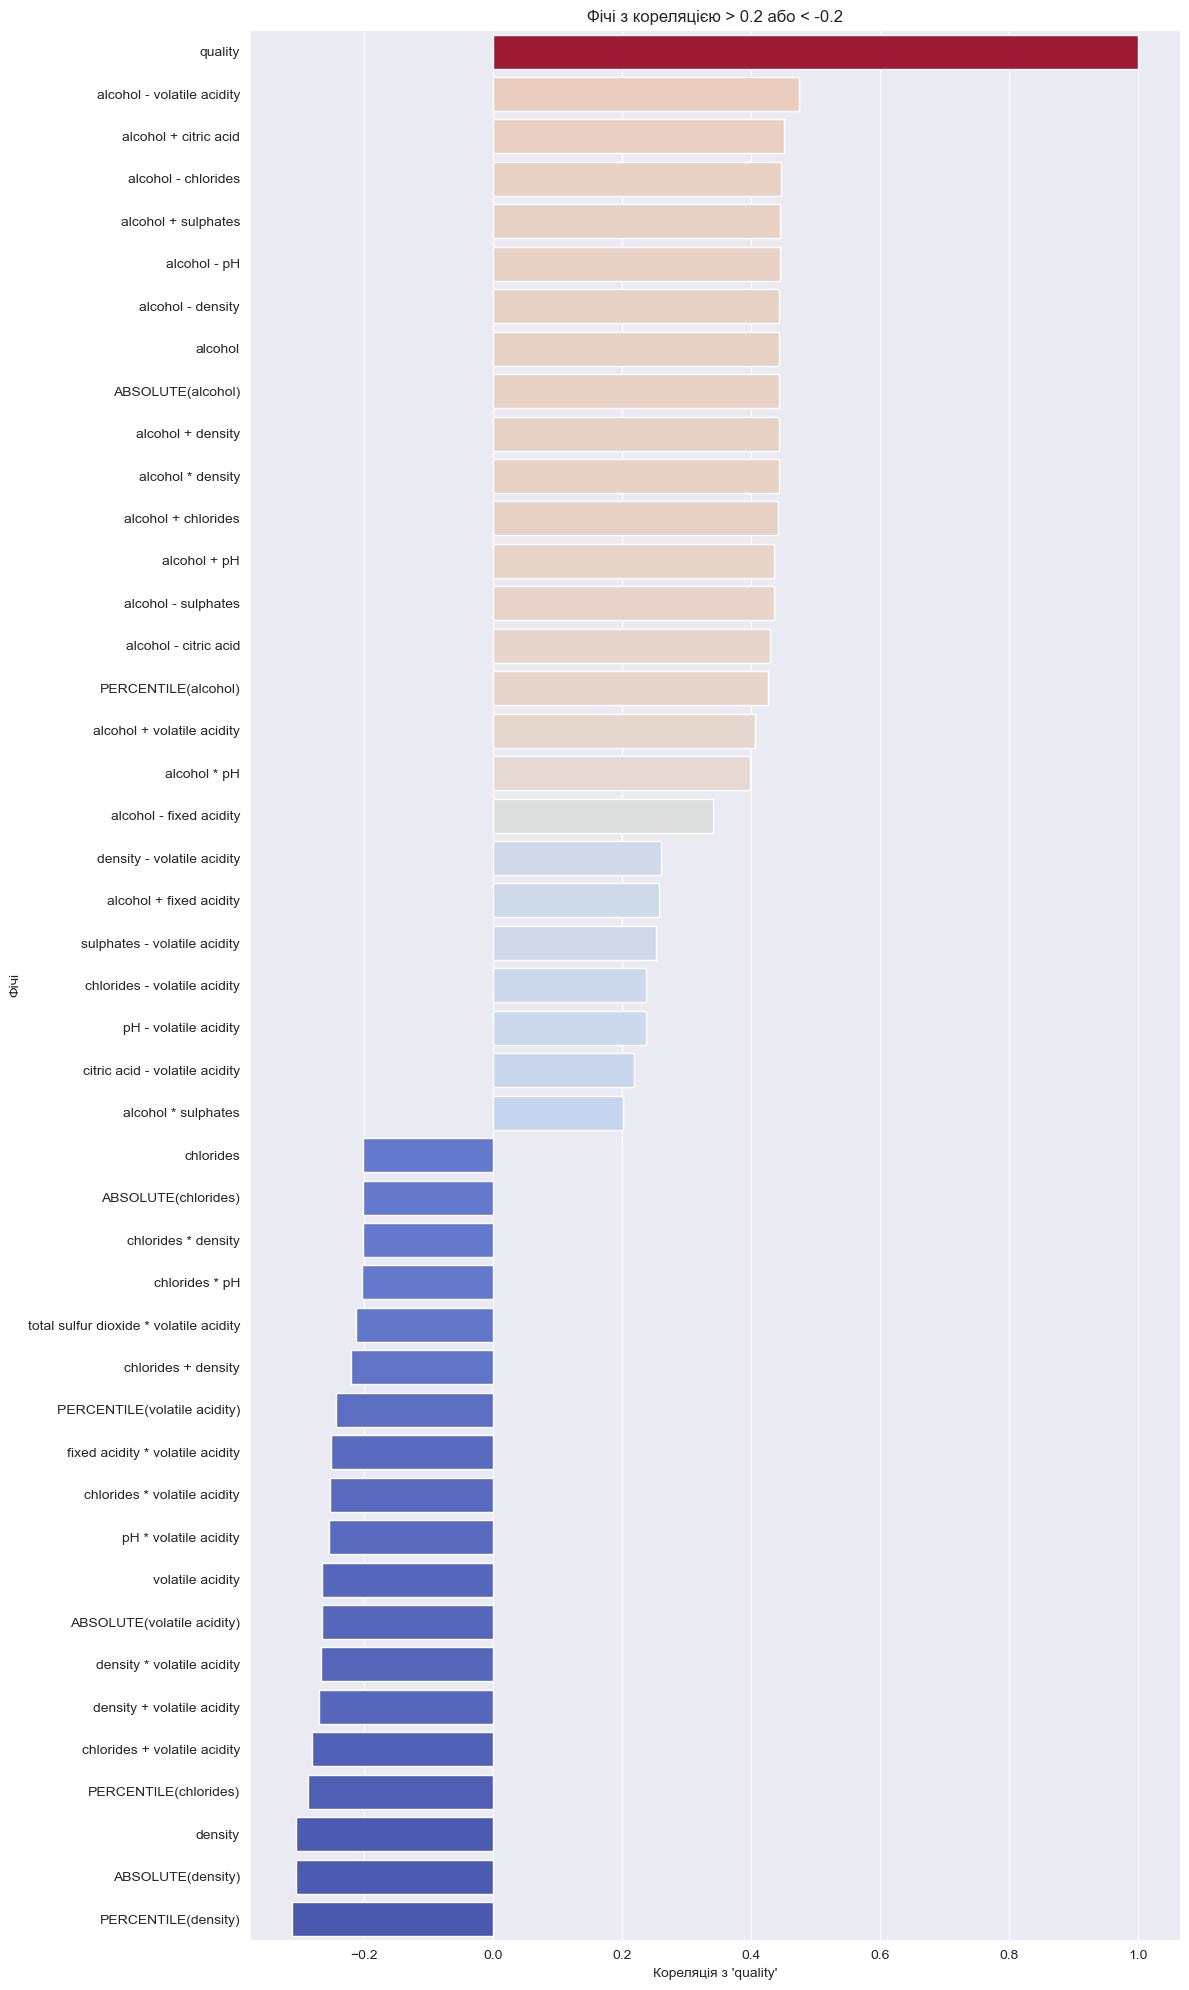

In [100]:
plt.figure(figsize=(12, 20))
sns.barplot(
    x=correlation[abs(correlation) > 0.2].values,
    y=correlation[abs(correlation) > 0.2].index,
    hue=correlation[abs(correlation) > 0.2].values,
    palette="coolwarm",
    legend=False
)
plt.xlabel("Кореляція з 'quality'")
plt.ylabel("Фічі")
plt.title("Фічі з кореляцією > 0.2 або < -0.2")
plt.tight_layout()
plt.show()

досить стабільна гарна кореляція 

In [134]:
# Додатковий відбір фіч за допомогою RFE
X_temp = feature_matrix_filtered.drop(columns=["quality"]).values
y_temp = feature_matrix_filtered["quality"].values
scaler_temp = StandardScaler()
X_temp_scaled = scaler_temp.fit_transform(X_temp)

n_features_available = X_temp.shape[1]  # Кількість доступних фіч
# n_features_to_select = min(50, n_features_available // 2)  # Вибираємо половину або 50, якщо менше
# print(f"Доступно фіч для RFE: {n_features_available}, вибираємо: {n_features_to_select}")

ridge_temp = Ridge(alpha=1.0)
rfe = RFE(estimator=ridge_temp, n_features_to_select=n_features_available)
rfe.fit(X_temp_scaled, y_temp)

RFE(estimator=Ridge(), n_features_to_select=44)

In [135]:
# Отримуємо індекси вибраних фіч
selected_rfe_indices = rfe.support_
selected_rfe_features = feature_matrix_filtered.drop(columns=["quality"]).columns[selected_rfe_indices].tolist()
selected_rfe_features.append("quality")  # Додаємо "quality" назад
feature_matrix_final = feature_matrix_filtered[selected_rfe_features]
print(f"\nКількість фіч після RFE: {feature_matrix_final.shape[1]}")


Кількість фіч після RFE: 45


In [136]:
feature_matrix_final = pd.concat([data_combined, feature_matrix_final.loc[:, ~feature_matrix_final.columns.isin(data_combined.columns)]], axis=1)

In [137]:
X = feature_matrix_final.drop(columns=["quality"]).values
y = feature_matrix_final["quality"].values


In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Масштабування фіч

In [139]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Підбір гіперпараметра alpha для Ridge 

In [140]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}
ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]},
             scoring='neg_mean_squared_error')

Найкраща модель


In [141]:
best_model = grid_search.best_estimator_
print("\nНайкраще значення alpha:", grid_search.best_params_['alpha'])
print("Найкращий результат на крос-валідації (MSE):", -grid_search.best_score_)


Найкраще значення alpha: 10.0
Найкращий результат на крос-валідації (MSE): 0.5283222427286007


In [142]:
y_pred = best_model.predict(X_test_scaled)

In [143]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nСередньоквадратична помилка (MSE) на тестовій вибірці:", mse)
print("Коефіцієнт детермінації (R²) на тестовій вибірці:", r2)




Середньоквадратична помилка (MSE) на тестовій вибірці: 0.5401431445963588
Коефіцієнт детермінації (R²) на тестовій вибірці: 0.2686405459884065


дивимось як працює модель з реальними числами

In [144]:
y_pred_rounded = np.round(y_pred)
print("\nРеальні значення:", y_test)
print("Передбачені значення (округлені):", y_pred_rounded)


Реальні значення: [8 5 7 ... 7 6 7]
Передбачені значення (округлені): [7. 5. 6. ... 7. 5. 6.]


10 найвагоміших фіч

In [145]:
feature_importance = pd.Series(best_model.coef_, index=feature_matrix_final.drop(columns=["quality"]).columns).sort_values(ascending=False)
print("\nвагомість фіч:")
print(feature_importance.head(10))



вагомість фіч:
alcohol * pH                        0.344968
residual sugar                      0.279048
fixed acidity * volatile acidity    0.258292
free sulfur dioxide                 0.109610
alcohol * sulphates                 0.089241
sulphates - volatile acidity        0.035474
chlorides * pH                      0.031810
chlorides - volatile acidity        0.027132
density - volatile acidity          0.023153
alcohol - pH                        0.020545
dtype: float64


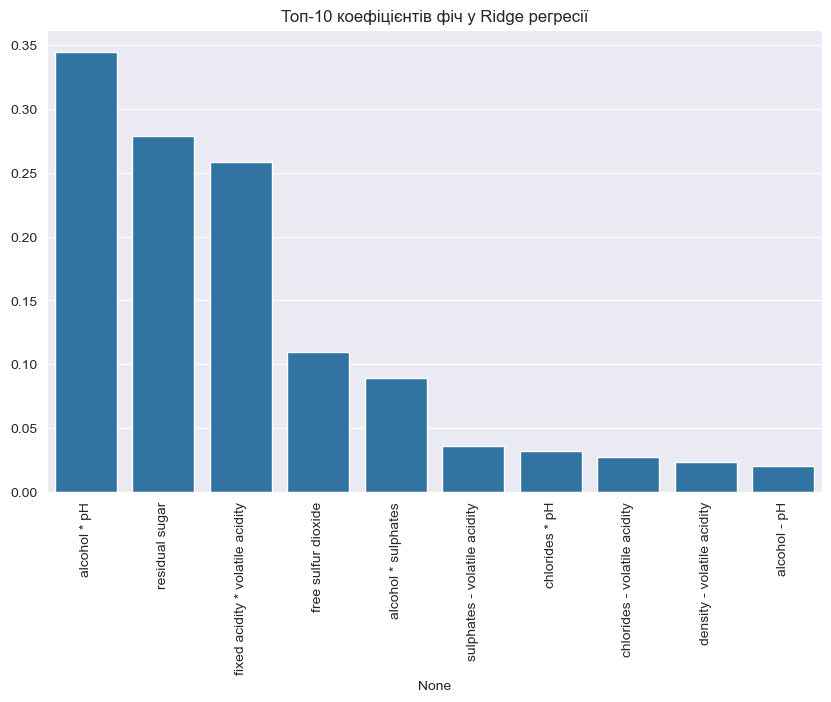

In [129]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.index[:10], y=feature_importance.values[:10])
plt.xticks(rotation=90)
plt.title("Топ-10 коефіцієнтів фіч у Ridge регресії")
plt.show()

ми бачимо що найвагомішими фічами у цій моделі стали фічі які ми створили 

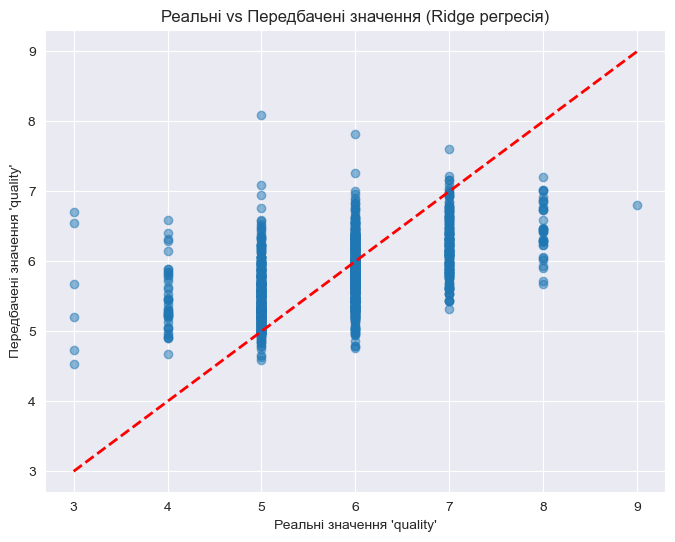

In [130]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Реальні значення 'quality'")
plt.ylabel("Передбачені значення 'quality'")
plt.title("Реальні vs Передбачені значення (Ridge регресія)")
plt.show()

<Axes: xlabel='quality', ylabel='Count'>

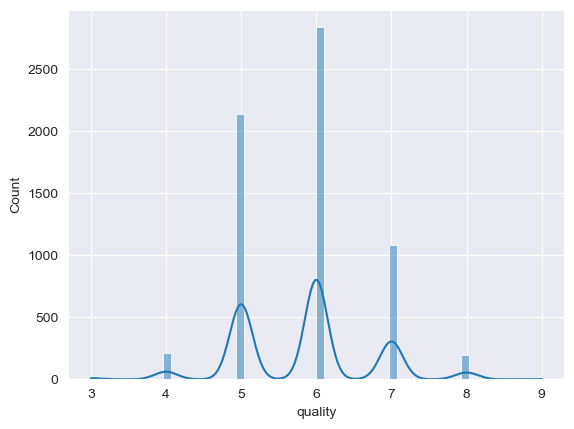

In [146]:
sns.histplot(data=data_combined, x='quality', kde=True)

Висновок по перше збільшення кількосі данних та розширення кількості фічей покращює модель але ми впираємося в обмежену кількість крайніх оцінок з графіку ми бачимо що з збільщеням кількості оцінок дуже добре впливає на передбачення моделі